# Imputation experiments

In [1]:
import glob
import numpy as np
import os
import torch
from matplotlib import pyplot
from treecat_exp.util import TEST, load_object
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
%config InlineBackend.rc = {'figure.facecolor': (1, 1, 1, 1)}

The following results were generated by `cleanup.py` by running
```sh
python main.py
```

In [2]:
results = []
for path in sorted(glob.glob(os.path.join(TEST, "cleanup.*.pkl"))):
    metrics = load_object(path)
    results.append(metrics)
    args = metrics["args"]
    print("{} {} {}".format(args.dataset,
                            args.delete_percent,
                            args.model))

housing 10 treecat
housing 20 treecat


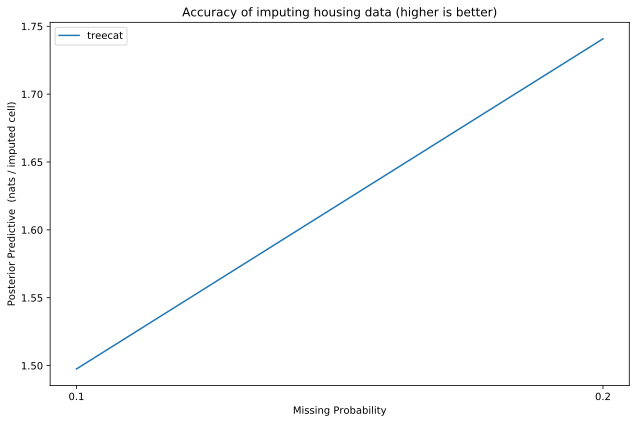

In [3]:
for dataset in sorted(set(m["args"].dataset for m in results)):
    pyplot.figure(figsize=(9, 6))
    for model in sorted(set(m["args"].model for m in results
                            if m["args"].dataset == dataset)):
        
        ms = [m for m in results if m["args"].dataset == dataset if m["args"].model == model]
        ms.sort(key=lambda m: m["args"].delete_percent)
        X = [m["args"].delete_percent / 100 for m in ms]
        Y = [m["posterior_predictive"] for m in ms]
        pyplot.plot(X, Y, label=model)
    X = list(sorted(set(m["args"].delete_percent / 100
                        for m in results if m["args"].dataset == dataset)))
    pyplot.xticks(X, labels=["{:0.2g}".format(x) for x in X])
    pyplot.title("Accuracy of imputing {} data (higher is better)".format(dataset))
    pyplot.xlabel("Missing Probability")
    pyplot.ylabel("Posterior Predictive  (nats / imputed cell)")
    pyplot.legend(loc="best")
    pyplot.tight_layout()

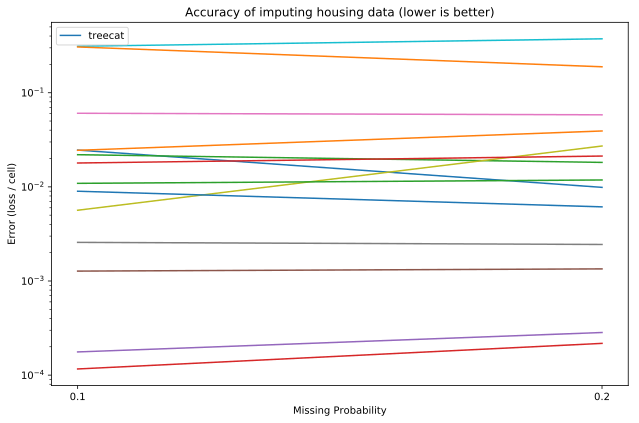

In [4]:
for dataset in sorted(set(m["args"].dataset for m in results)):
    pyplot.figure(figsize=(9, 6))
    for model in sorted(set(m["args"].model for m in results
                            if m["args"].dataset == dataset)):
        ms = [m for m in results if m["args"].dataset == dataset if m["args"].model == model]
        ms.sort(key=lambda m: m["args"].delete_percent)
        # pyplot.violinplot([m["losses"] for m in ms])
        X = [m["args"].delete_percent / 100 for m in ms]
        for f in range(len(ms[0]["losses"])):
            Y = [m["losses"][f] for m in ms]
            pyplot.plot(X, Y, label=model if f == 0 else None)
    X = list(sorted(set(m["args"].delete_percent / 100
                        for m in results if m["args"].dataset == dataset)))
    pyplot.yscale("log")
    pyplot.xticks(X, labels=["{:0.2g}".format(x) for x in X])
    pyplot.title("Accuracy of imputing {} data (lower is better)".format(dataset))
    pyplot.xlabel("Missing Probability")
    pyplot.ylabel("Error (loss / cell)")
    pyplot.legend(loc="best")
    pyplot.tight_layout()